In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
#訓練するための画像とテストの画像を分ける
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# 60,000 行 で 28 x 28 ピクセル の 画像
print(train_images.shape)
# 10,000 行 で 28 x 28 ピクセル の 画像
print(test_images.shape) 

(60000, 28, 28)
(10000, 28, 28)


Image Label: 0


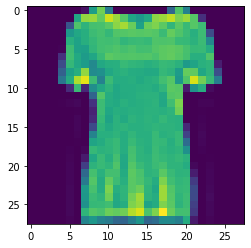

In [7]:
#trainの画像をみてみる
img_index = 10 #⇒これに関してはindexを変えることで別の画像を表示させることができる
img = train_images[img_index]
print("Image Label: " + str(train_labels[img_index]))
plt.imshow(img)

In [5]:
#ニューラルネットワークのモデルを作成
model = keras.Sequential([
    #28 x 28 ピクセルの画像を 28 x 28 = 784のベクトル（特徴量）に変換
    keras.layers.Flatten(input_shape=(28,28)),
    #128個のニューロンと Relu関数をもつ層
    keras.layers.Dense(128, activation=tf.nn.relu),
    #10個のニューロンと softmax関数をもつ層
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
#損失関数や最適化関数をコンパイルし訓練する
model.compile(
   optimizer=tf.optimizers.Adam(), 
   loss='sparse_categorical_crossentropy', 
   metrics = ['accuracy'])

model.fit(train_images, 
          train_labels,  
          epochs=5, 
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.2628 - accuracy: 0.6939
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7101 - accuracy: 0.7656
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5852 - accuracy: 0.8081
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5322 - accuracy: 0.8220
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5016 - accuracy: 0.8312


In [12]:
#モデルを評価する
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.8241


[0.532856285572052, 0.8241000175476074]

In [13]:
#予測を作成
predictions = model.predict(test_images[:5])
#予測のラベル
print(np.argmax(predictions, axis=1)) 
#実際ののラベル
print(test_labels[:5]) 

[9 2 1 1 6]
[9 2 1 1 6]


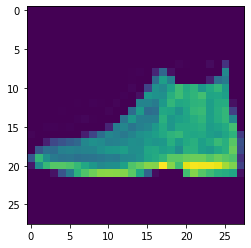

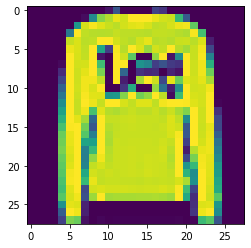

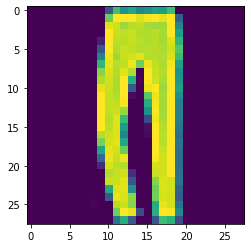

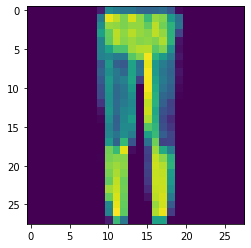

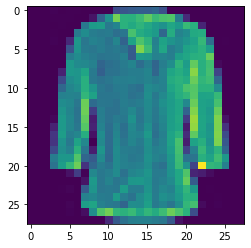

In [15]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels)
  plt.show()